# Stereopy Study

- Stereopy is a fundamental and comprehensive tool for mining and visualization based on spatial transcriptomics data, such as Stereo-seq(spatial enhanced resolution omics sequencing) data.
- Stereopy 是一种基于空间转录组学数据（如 Stereo-seq（空间增强分辨率组学测序）数据）进行挖掘和可视化的基础和综合工具。

<img src="https://stereopy.readthedocs.io/en/latest/_images/Stereopy_workflow_v1.0.0.png" width="500" alt="工作流程图">

- 这个工作流程是 Stereo-seq（空间转录组）数据分析 的典型流程，基于 StereoExpData（类似于 Scanpy 或 Seurat 的数据结构）进行。
- 整体可分为 预处理 → 基础分析 → 多切片分析 → 可视化 → 图像处理 几个主要模块。

## Quick Start (Square Bin)

### introduction

<div style="display: flex; gap: 10px;">
    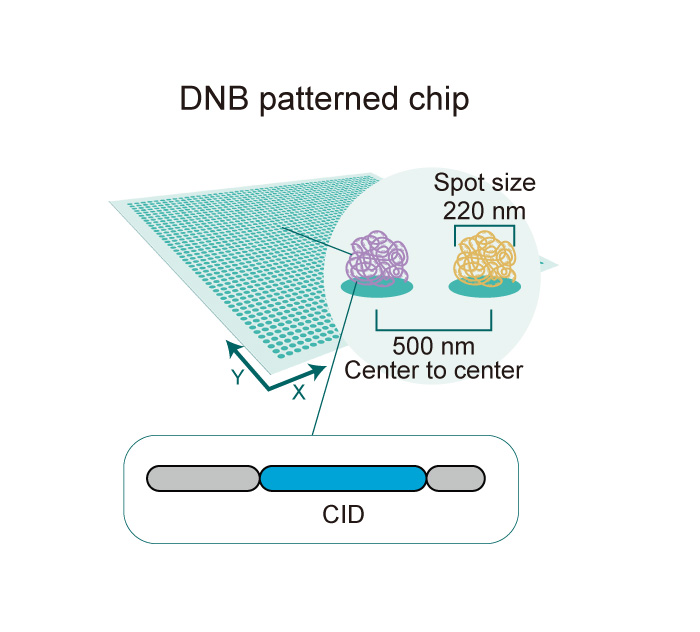
    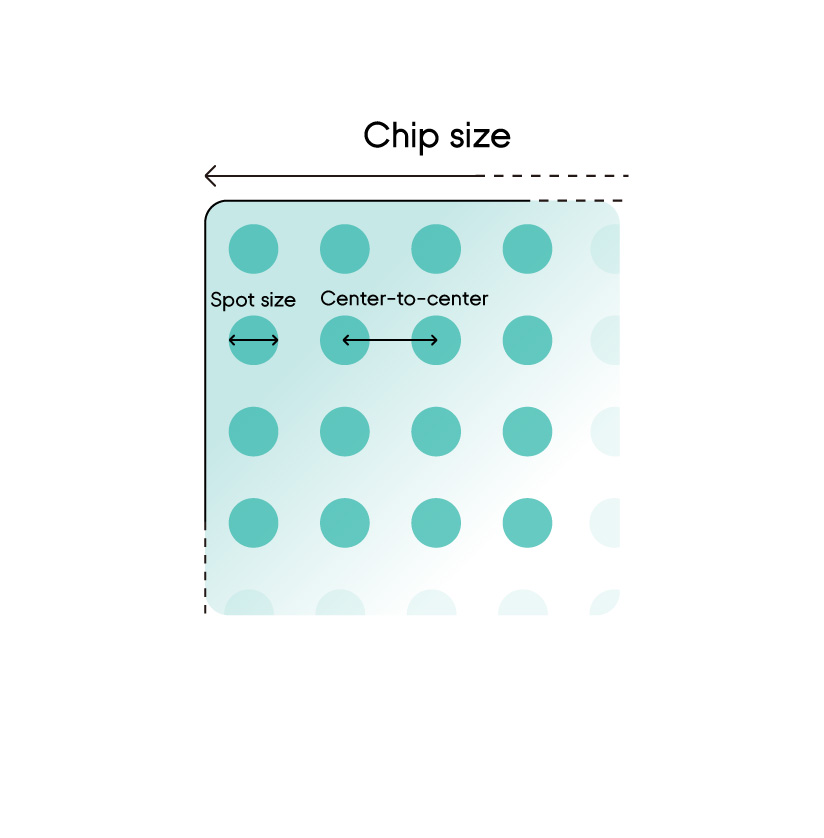
</div>

<details>
<summary><i>details</i></summary>

**Stereo-seq（空间转录组技术）** 的分辨率设定和 `bin_size` 参数的逻辑关系如下：

---

 **1. 图中参数与Stereo-seq技术的关联**
- **DNB patterned chip** 的图示展示了纳米级位点（spots）的排列方式：
  - **单个spot直径（Spot size）**: 220 nm  
    - 对应Stereo-seq中的 **nanopore（纳米孔）**，是捕获mRNA的最小物理单元。
  - **中心间距（Center-to-center）**: 500 nm  
    - 相邻两个spot之间的中心距离，决定了spot的排列密度。

- **Nanopore半径（bin1）**: 250 nm  
  - 每个纳米孔的物理半径（比图中spot略大，可能包含边缘间隙）。

---

 **2. `bin_size` 参数的作用**
在Stereo-seq数据分析中，原始纳米孔（nanopore）的分辨率过高（单孔仅捕获少量分子），因此需通过 **`bin_size`** 将多个相邻纳米孔合并为一个 **bin单元**，以提高信噪比和数据分析效率：
- **`bin_size=1`**: 单纳米孔（250 nm半径）作为bin单元，分辨率最高（纳米级），但数据稀疏。
- **`bin_size=20`**: 合并20×20个纳米孔为一个bin单元，实际大小取决于中心间距：
  - **若中心间距=500 nm** → bin单元边长 ≈ 20×500 nm = **10 μm**  
  - **若中心间距=715 nm** → bin单元边长 ≈ 20×715 nm = **14.3 μm**  

---

 **3. 图示与Stereo-seq的对应关系**
- **图中的220 nm spot**  
  - 对应Stereo-seq的 **单个纳米孔（nanopore）**，实际检测时会扩展为250 nm半径（覆盖周边区域）。
- **图中的500 nm中心间距**  
  - 决定了合并纳米孔时的空间尺度。例如：
    - `bin_size=20` → 10 μm的bin单元（500 nm × 20）。
    - `bin_size=10` → 5 μm的bin单元（500 nm × 10）。

---

 **4. 技术意义**
- **分辨率与灵敏度的权衡**：  
  - 纳米级原始分辨率（250 nm）可捕获精细空间信息，但需合并（binning）以提高分子检出率。
- **灵活的参数调整**：  
  - 通过调整 `bin_size`，可适应不同实验需求（如高分辨率单细胞分析 vs. 组织水平全局模式）。

---

 **5. 示例计算**
假设中心间距=500 nm：
- `bin_size=1` → 单bin=500 nm × 500 nm（0.25 μm²）  
- `bin_size=20` → 单bin=10 μm × 10 μm（100 μm²）  

---

 **总结**
图中展示的 **DNB芯片的纳米级spot排列（220 nm/500 nm）** 是Stereo-seq实现超高分辨率的基础，而 `bin_size` 参数通过合并相邻纳米孔，在分辨率和数据质量之间取得平衡。实际分析中需根据研究目标（单细胞精度或组织区域）选择合适的 `bin_size`。

</details>

### Reading data

In [7]:
import sys
import os

import stereo as st
import warnings
warnings.filterwarnings('ignore')

C:\Users\yy193\anaconda3\envs\py38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Get attributes of the GEF file

In [31]:
data_path = 'C:/Users/yy193/Desktop/GSE269906_RAW/GSM8330060_B02009F6.tissue.gef'
st.io.read_gef_info(data_path)

[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1517][INFO]: This is GEF file which contains traditional bin infomation.
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1518][INFO]: bin_type: bins
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1521][INFO]: Bin size list: ['bin1']
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1527][INFO]: Resolution: 500
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1530][INFO]: Gene count: 43326
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1539][INFO]: offsetX: 1
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1542][INFO]: offsetY: 1
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1545][INFO]: Width: 26458
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1548][INFO]: Height: 26457
[2025-03-27 23:53:18][Stereo][32960][MainThread][18200][reader][1551][INFO]: Max Exp: 39


{'bin_list': ['bin1'],
 'resolution': 500,
 'gene_count': 43326,
 'offsetX': 1,
 'offsetY': 1,
 'width': 26458,
 'height': 26457,
 'maxExp': 39}

<details>
<summary><i>details</i></summary>


 **核心信息解读**

| 字段 | 值 | 说明 |
|------|----|------|
| **文件类型** | `traditional bin` | 标准分箱格式的 GEF 文件，存储基因表达矩阵和空间坐标。 |
| **分箱类型** | `bins` | 数据以分箱（bin）形式组织，未使用其他存储方式（如 `tile`）。 |
| **可用分箱级别** | `['bin1']` | 仅包含原始分辨率（`bin1`），未预生成合并后的分箱（如 `bin20`）。 |
| **分辨率** | `500` | 每个 bin 的物理大小为 **500 纳米**（中心间距）。 |
| **基因数量** | `43326` | 检测到 **43,326 个基因**，覆盖全转录组。 |
| **空间偏移** | `offsetX=1`, `offsetY=1` | 数据在芯片上的起始坐标偏移（单位：bin），可能是芯片设计或切割导致。 |
| **空间尺寸** | `width=26458`, `height=26457` | 数据覆盖的 bin 数量（约 26k × 26k），物理尺寸约为：<br> • 宽度：26,458 × 500 nm = **13,229 μm**（～1.32 cm）<br> • 高度：26,457 × 500 nm = **13,228.5 μm**（～1.32 cm） |
| **最大表达量** | `39` | 单个 bin 中检测到的最大 UMI 数为 39，反映数据稀疏性。 |

---

 **关键点分析**
1. **超高分辨率**  
   - `bin1` 对应 500 nm 分辨率，可捕获 **亚细胞级** 基因表达空间分布（如神经元突触、细胞膜附近信号）。

2. **数据规模**  
   - 约 1.32 cm × 1.32 cm 的组织区域，适合 **全切片扫描** 或 **大组织块分析**。

3. **偏移量（offsetX/Y）**  
   - 值为 `1` 表示数据在芯片坐标系中从 `(1, 1)` 开始存储（而非 `(0, 0)`），可能因芯片布局或数据裁剪导致，需在后续分析中统一坐标系统。

4. **稀疏性提示**  
   - `maxExp=39` 表明单个 bin 的分子检出数较低，通常需要：  
     - 合并多个 bin（如 `bin_size=20` → 10 μm 分辨率）以提高信噪比。  
     - 过滤低表达基因或低质量区域（通过 `data.tl.filter_cells()`）。

---

 **技术对比**
 
| 参数 | 本例数据 | 常规 Visium（10x） |
|------|----------|-------------------|
| **分辨率** | 500 nm | 55 μm |
| **基因数** | 43,326 | ~3,000-5,000 |
| **覆盖区域** | ~1.32 cm² | 6.5 mm × 6.5 mm |
| **应用场景** | 亚细胞/单细胞级空间分析 | 组织区域级分析 |

---

 **总结**
该数据为 **超高分辨率空间转录组**（Stereo-seq），适合研究：  
- 细胞微环境异质性  
- 罕见细胞类型的空间定位  
- 亚细胞尺度基因表达模式  

需注意调整 `bin_size` 和过滤策略以平衡分辨率与数据质量。

</detail>

#### Load data to generate a StereoExpData object.

In [33]:
data = st.io.read_gef(file_path=data_path, bin_size=50)

# simply type the varibale to get related information
data

[2025-03-27 23:53:47][Stereo][32960][MainThread][18200][reader][1339][INFO]: read_gef begin ...


[2025-03-27 23:54:23][Stereo][32960][MainThread][18200][reader][1488][INFO]: the matrix has 141494 cells, and 43326 genes.
[2025-03-27 23:54:23][Stereo][32960][MainThread][18200][reader][1489][INFO]: read_gef end.


StereoExpData object with n_cells X n_genes = 141494 X 43326
bin_type: bins
bin_size: 50
offset_x = 1
offset_y = 1
cells: ['cell_name']
genes: ['gene_name']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

<details>
<summary><i>details</i></summary>

---

**数据结构（StereoExpData 对象）**

| 字段 | 值 | 说明 |
|------|----|------|
| **n_cells × n_genes** | 141,494 × 43,326 | 表达矩阵的维度（细胞数 × 基因数） |
| **bin_type** | `bins` | 数据以分箱（bin）形式存储 |
| **bin_size** | `50` | 分箱大小为 **50**（即 50×500 nm = **25 μm**，假设分辨率为 500 nm） |
| **offset_x / offset_y** | `1` | 空间坐标的起始偏移量（单位：bin） |
| **cells** | `['cell_name']` | 细胞/位点的标识字段（如坐标或 ID） |
| **genes** | `['gene_name']` | 基因名称字段 |
| **cells_matrix** | `['spatial']` | 包含空间坐标信息（如 x、y 位置） |
| **Layers** | 空 | 未存储其他数据层（如归一化后的矩阵） |
| **tl.result** | 空列表 `[]` | 尚未进行任何分析（如聚类、差异基因等） |

---
</details>

### Preprocessing

- Data preprocessing includes three modules: quality control, filtering and normalization.

#### Quality Control

- 三个质控指标
- `total_counts - the total counts per cell`;

- `n_genes_by_counts - the number of genes expressed in count maxtrix`;

- `pct_countss_mt - the percentage of counts in mitochondrial genes`.

In [35]:
data.tl.cal_qc()

[2025-03-27 23:55:02][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-27 23:55:03][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: cal_qc end, consume time 1.8666s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

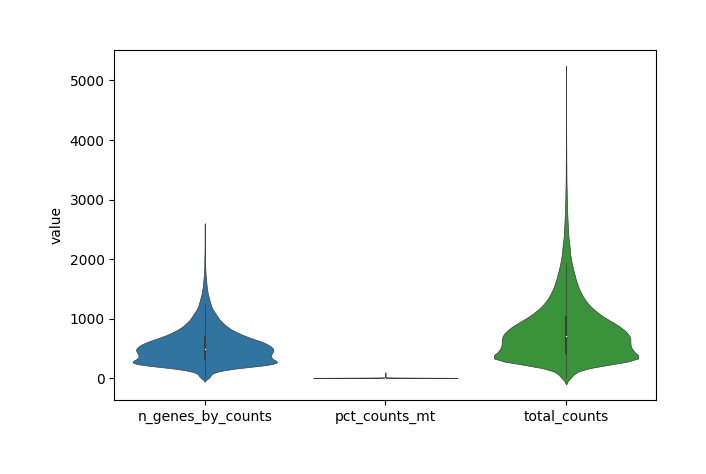

In [37]:
data.plt.violin()

- Show the spatial scatter figure of QC distribution.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

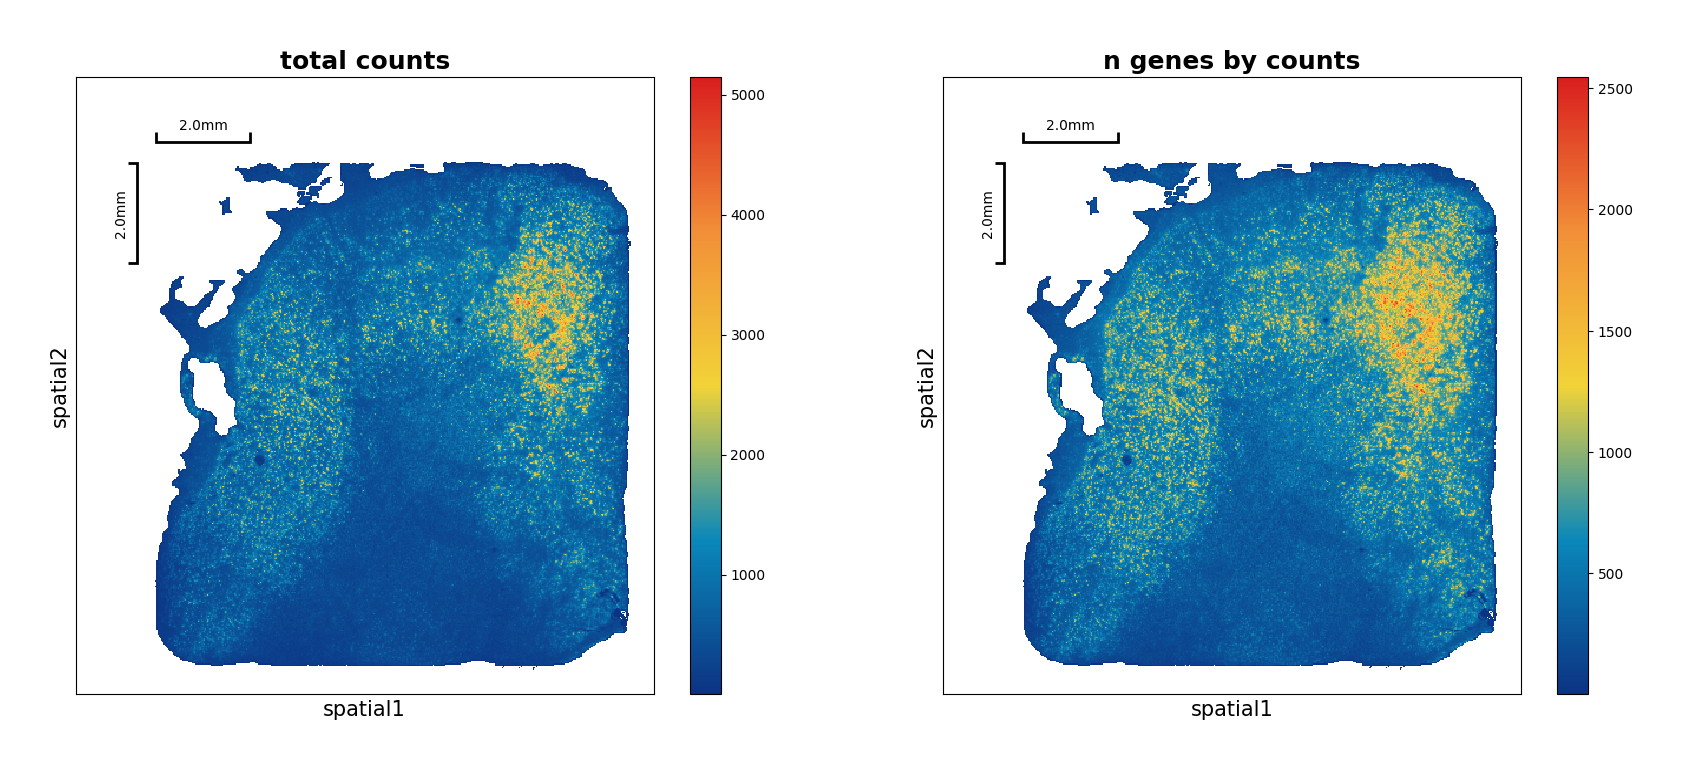

In [39]:
data.plt.spatial_scatter()

#### Filtering

- Three basic methods are provided to filter data maxtrix:
- `data.tl.filter_cells`, `data.tl.filter_genes`, `data.tl.filter_coordinates`

Literally, you could filter data on three optional levels: cell, gene and coordinate where a `bin unit` could be treated as a made-up cell provisionally.

We filter `bin units` (**bin_size** is set to 50 at the beginning of our example) based on quality control indicators which have been calculated in QC part. Beforehand, observe the distribution of cells according to scatter plots.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

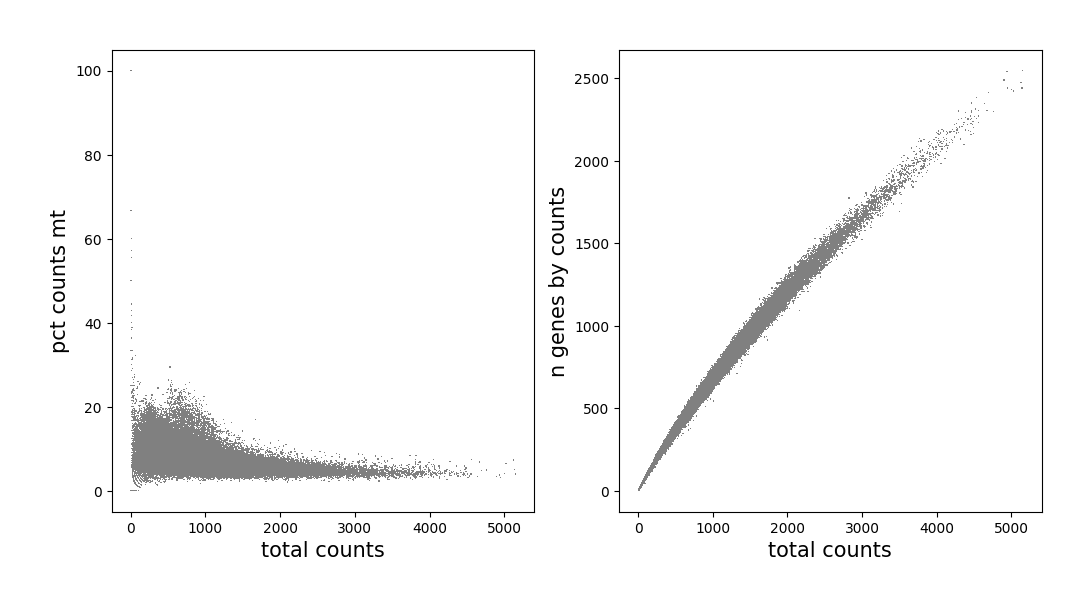

In [41]:
data.plt.genes_count()

Remove cells that have too many mitochondrial genes expressed, as well as cells without enough counts and genes expressed.

In [43]:
data.tl.filter_cells(
        min_counts=20,
        min_genes=3,
        pct_counts_mt=5,
        inplace=True
        )
data

[2025-03-27 23:56:10][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-27 23:56:10][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: filter_cells end, consume time 0.5768s.


StereoExpData object with n_cells X n_genes = 12602 X 43326
bin_type: bins
bin_size: 50
offset_x = 1
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

So in order to save the data and recall it conveniently, you can save the raw expression matrix by `data.tl.raw_checkpoint()`

In [45]:
data.tl.raw_checkpoint()

In [47]:
data.tl.raw

StereoExpData object with n_cells X n_genes = 12602 X 43326
bin_type: bins
bin_size: 50
offset_x = 1
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

When you want to get raw data, just run `data.tl.reset_raw_data()`

#### Normalization

 In this module, you can choose from following common methods of standardization:


- [normalize_total](https://www.nature.com/articles/nbt.3192)
- [log1p](https://academic.oup.com/bioinformatics/article/37/15/2223/6155989)
- scale
- [scTransform](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-)
- [quantile](https://github.com/panjie-payne/test-sphinx/blob/master/docs/source/_static/quantile.pdf)

<details>
<summary><i>details</i></summary>

在单细胞RNA测序（scRNA-seq）数据分析中，标准化（Normalization）是消除技术偏差（如测序深度差异）的关键步骤。以下是五种常见标准化方法的原理、应用场景及优缺点对比：

---

 **1. `normalize_total`（文库大小标准化）**
- **原理**：  
  将每个细胞的UMI总数缩放到相同的目标值（如1万或中位数），公式：  
$$
\text{Normalized Counts} = \frac{\text{原始计数}}{\text{细胞总UMI数}} \times \text{目标值}
$$
- **适用场景**：  
  - 初步校正测序深度差异（如10x Genomics数据）。  
  - 常与后续的`log1p`或`scale`联用。  
- **优点**：简单快速，保留数据稀疏性。  
- **缺点**：忽略基因长度和组成偏差。  
- **文献**：  
  [Lun et al., Nature Biotechnology 2016](https://www.nature.com/articles/nbt.3192)  

---

 **2. `log1p`（对数归一化）**
- **原理**：  
  对标准化后的数据加1后取自然对数：$$\log(\text{Normalized Counts} + 1) $$。  
  - **"+1"**：避免对0取对数。  
- **适用场景**：  
  - 降低高表达基因的权重，使数据更接近正态分布。  
  - 适用于下游PCA或聚类分析。  
- **优点**：压缩极端值，稳定方差。  
- **缺点**：对低表达基因可能引入噪声。  
- **文献**：  
  [Hafemeister & Satija, Bioinformatics 2021](https://academic.oup.com/bioinformatics/article/37/15/2223/6155989)  

---

 **3. `scale`（Z-score标准化）**
- **原理**：  
  对每个基因的表达值进行中心化和缩放：  
  $$ Z = \frac{X - \mu}{\sigma} $$  
  - μ: 基因表达的均值，σ: 标准差。  
- **适用场景**：  
  - 需要比较基因间表达差异时（如差异表达分析）。  
  - 通常用于Seurat的`ScaleData`步骤。  
- **优点**：消除基因间量纲差异，适合线性模型。  
- **缺点**：可能过度放大低表达基因的噪声。  

---

 **4. `scTransform`（基于负二项模型的标准化）**
- **原理**：  
  - 使用正则化负二项回归模型，同时校正测序深度和基因间方差。  
  - 生成残差（Pearson残差）作为标准化后的值。  
- **适用场景**：  
  - 高稀疏数据（如droplet-based scRNA-seq）。  
  - 替代`normalize_total` + `log1p` + `scale`的联合步骤。  
- **优点**：  
  - 自动处理技术噪声，减少批次效应。  
  - 保留生物异质性。  
- **缺点**：计算复杂度高。  
- **文献**：  
  [Hafemeister & Satija, Genome Biology 2019](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-1)  

---

 **5. `quantile`（分位数标准化）**
- **原理**：  
  - 强制所有细胞的表达值分布相同（匹配相同的分位数）。  
  - 常用于芯片数据，单细胞中较少使用。  
- **适用场景**：  
  - 需要严格对齐不同细胞表达分布时。  
- **优点**：消除分布差异，适合跨样本比较。  
- **缺点**：  
  - 破坏单细胞数据的稀疏性。  
  - 可能掩盖真实的生物异质性。  
- **参考**：  
  [Quantile Normalization PDF](https://github.com/panjie-payne/test-sphinx/blob/master/docs/source/_static/quantile.pdf)  

---

 **方法对比总结**
 
| 方法               | 核心思想                     | 适用阶段       | 保留稀疏性 | 计算效率 |
|--------------------|----------------------------|--------------|-----------|---------|
| `normalize_total`  | 文库大小缩放                | 预处理        | 是        | 高      |
| `log1p`            | 对数压缩                   | 预处理        | 部分      | 高      |
| `scale`            | Z-score标准化              | 下游分析      | 否        | 中      |
| `scTransform`      | 负二项模型残差             | 替代前三步    | 是        | 低      |
| `quantile`         | 强制分布一致               | 特殊需求      | 否        | 中      |

---

 **选择建议**
1. **常规流程**：  
   `normalize_total` → `log1p` → `scale`（Seurat默认流程）。  
2. **高稀疏数据**：  
   直接使用`scTransform`（尤其适合大型数据集）。  
3. **避免使用**：  
   `quantile`标准化可能破坏单细胞数据的特性，慎用！  

根据数据特征和分析目标灵活选择方法，必要时通过PCA或聚类效果验证标准化质量。

</details>

Run a combination method of `normalize_total` and `log1p` to normalize gene expression matrix as below:

In [49]:
# inplace is set to True by default

data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

[2025-03-27 23:56:45][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run normalize_total...
[2025-03-27 23:56:45][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: normalize_total end, consume time 0.1276s.
[2025-03-27 23:56:45][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run log1p...
[2025-03-27 23:56:45][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: log1p end, consume time 0.1825s.


If you use `data.tl.sctransform` which includes the function of finding highly variable genes, you do not need to run `data.tl.highly_variable_genes`. In the subsequent `data.tl.pca` method, the parameter `use_highly_genes` has to be set as `False`. In brief, whether to use highly variable genes to run PCA depends on `filter_hvgs` in the normalization of scTransform. Learn more about [scTransform](https://github.com/STOmics/stereopy/blob/main/docs/source/Tutorials/sctransform.ipynb).

#### Highly variable genes

Identify highly variable genes in cells.

In [51]:
data.tl.highly_variable_genes(
        min_mean=0.0125,
        max_mean=3,
        min_disp=0.5,
        n_top_genes=2000,
        res_key='highly_variable_genes'
        )

[2025-03-27 23:56:55][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2025-03-27 23:56:58][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: highly_variable_genes end, consume time 2.7556s.


If `data.tl.scale(zero_center=False)` is used, sparse matrix will be used for calculation, which can greatly reduce the memory required for running.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

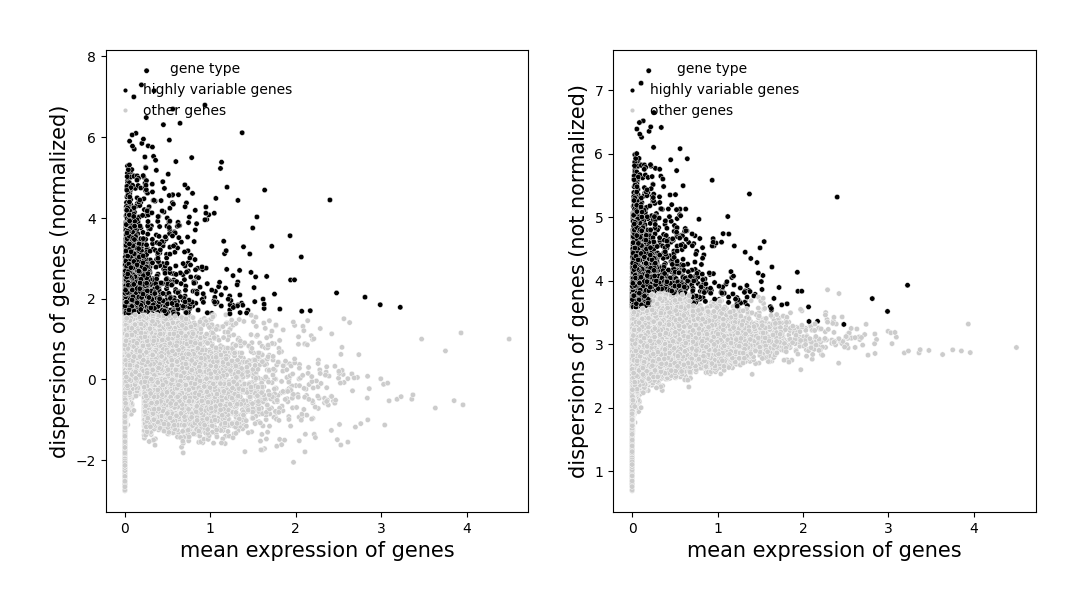

In [53]:
# remember to choose a res_key when plot

data.plt.highly_variable_genes(res_key='highly_variable_genes')

Scale each gene to unit variance. Clip values exceeding standard deviation 10. If `data.tl.scale(zero_center=False)` is used, sparse matrix will be used for calculation, which can greatly reduce the memory required for running.

In [55]:
data.tl.scale(max_value=10, zero_center=True)

[2025-03-27 23:57:37][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run scale...
[2025-03-27 23:57:44][Stereo][32960][MainThread][18200][scale][53][INFO]: Truncate at max_value 10
[2025-03-27 23:57:45][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: scale end, consume time 7.6860s.


## Embedding

### PCA (Principal component analysis)

As a statistical technique for reducing dimensionality of a data set, PCA finds the max axes of greatest variation, which preserve as much information as possible. Notice that if set parameter `use_highly_genes` to `True`, only highly variable genes are used to run.

In [57]:
data.tl.pca(
        use_highly_genes=False,
        n_pcs=30,
        res_key='pca'
        )

[2025-03-27 23:57:52][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run pca...
[2025-03-27 23:58:13][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: pca end, consume time 20.9814s.


When the parameter `res_key` arises, the corresponding result will be stored automatically, simply check:

In [59]:
data.tl.key_record

{'hvg': ['highly_variable_genes'],
 'pca': ['pca'],
 'neighbors': [],
 'umap': [],
 'cluster': [],
 'marker_genes': []}

We can plot the elbow to help us to determine how to choose PCs to be used.

[2025-03-27 23:58:43][Stereo][32960][MainThread][18200][plot_collection][84][INFO]: register plot_func elbow to <stereo.plots.plot_collection.PlotCollection object at 0x000001A040C9D130>


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

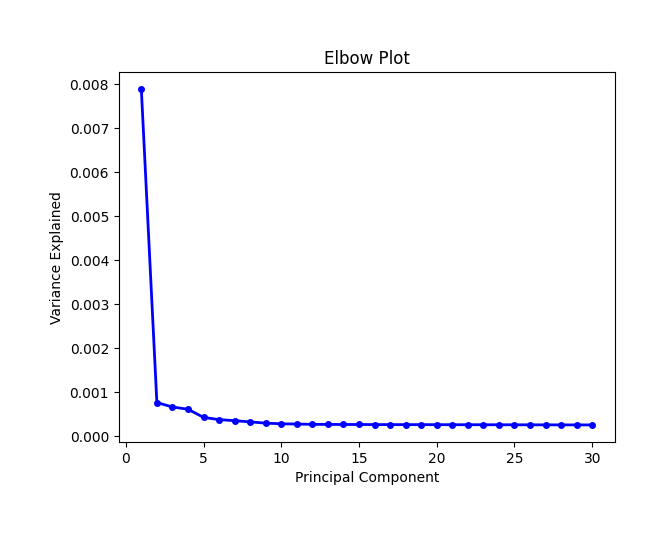

In [61]:
data.plt.elbow(pca_res_key='pca')

### Neighborhood graph

After PCA, we compute the neighborhood graph of cells using the PCA representation of the expression matrix.

In [63]:
data.tl.neighbors(
        pca_res_key='pca',
        n_pcs=30,
        res_key='neighbors'
        )

# compute spatial neighbors
data.tl.spatial_neighbors(
        neighbors_res_key='neighbors',
        res_key='spatial_neighbors'
        )

[2025-03-27 23:58:54][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run neighbors...
[2025-03-27 23:59:49][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: neighbors end, consume time 55.0693s.
[2025-03-27 23:59:49][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run spatial_neighbors...
[2025-03-27 23:59:54][Stereo][32960][MainThread][18200][reader][960][INFO]: Adding sample in adata.obs['orig.ident'].
[2025-03-27 23:59:54][Stereo][32960][MainThread][18200][reader][963][INFO]: Adding data.position as adata.obsm['spatial'] .
[2025-03-27 23:59:54][Stereo][32960][MainThread][18200][reader][968][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2025-03-27 23:59:54][Stereo][32960][MainThread][18200][reader][1008][INFO]: Adding data.tl.result['highly_variable_genes'] into adata.var .
[2025-03-27 23:59:54][Stereo][32960][MainThread][18200][reader][1051][INFO]: Adding data.tl.result['pca'] into adata.obsm['X_pca'] .
[2025-03-2

In addition, we also provide `data.tl.spatial_neighbors` to compute a spatial neighbors graph.

### UMAP

It’s strongly to suggest embedding the graph in two dimensions using UMAP.

In [65]:
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2025-03-28 00:00:16][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2025-03-28 00:00:26][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: umap end, consume time 9.4931s.


Plot the umap result of two genes: **Atpif1** and **Tmsb4x**.

In [69]:
# data.plt.umap(gene_names=['Atpif1', 'Tmsb4x'], res_key='umap')

## Clustering

Currently we provide three common clustering methods, including **Leiden**, **Louvain** and **Phenograph**.

In this tool, you can re-run the normalization method before clustering if the parameter `normalize_method is not None`. Then by default, we perform PCA to reduce the dimensionalites of the new normalization result, and use top 30 pcs to run clustering.

At this stage, we strongly recommend using **leiden**.

### Leiden

In [71]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

[2025-03-28 00:01:58][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run leiden...
[2025-03-28 00:02:01][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: leiden end, consume time 2.0902s.


Show the spatial distribution of the Leiden clustering.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

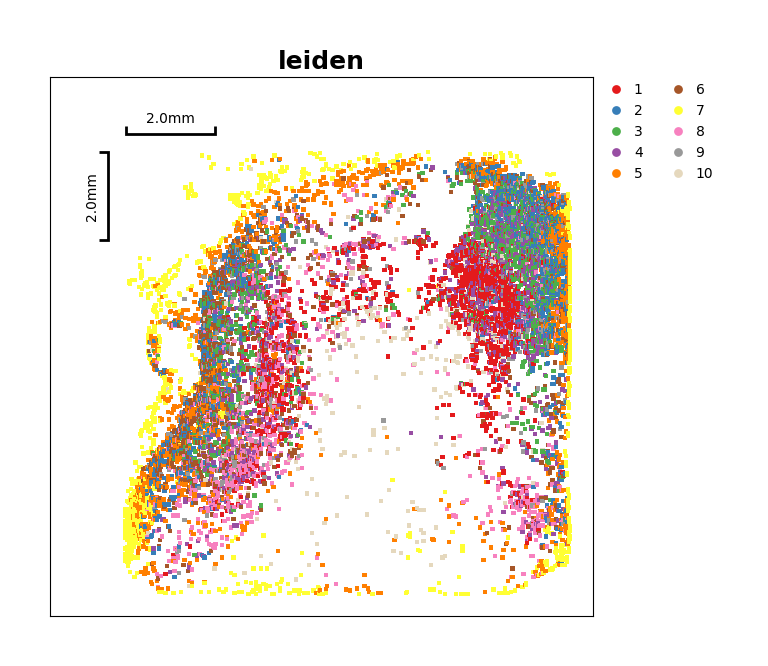

In [73]:
data.plt.cluster_scatter(res_key='leiden')

You also can just show partial clustering result.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

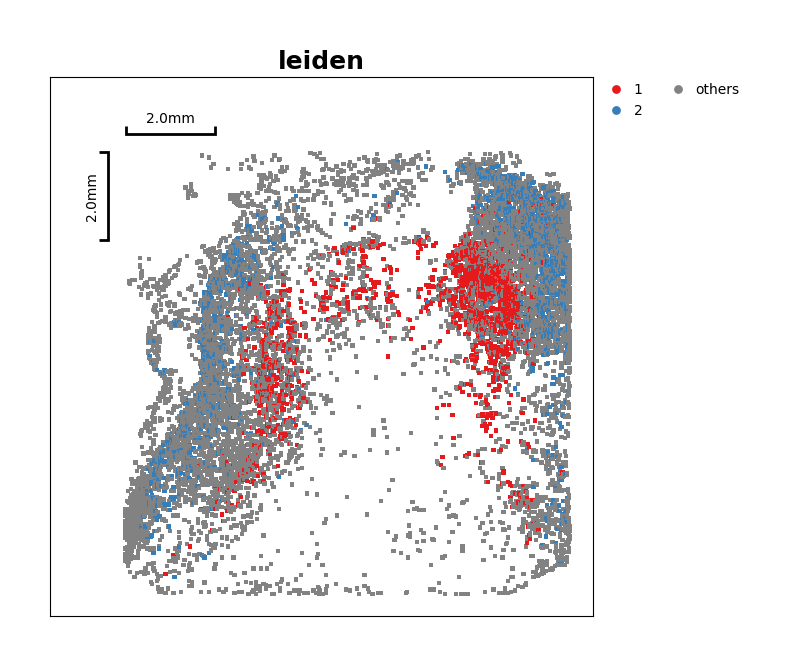

In [75]:
data.plt.cluster_scatter(res_key='leiden', groups=['1', '2'])

Show the distribution of the UMAP embedding.

In [ ]:
data.plt.umap(res_key='umap', cluster_key='leiden')

`data.plt.interact_cluster` generates an interact module from Jupyter Notebook and basic interactive manipulations could be done here. Simple clicks help you finish a series of operations, inclusing moving, tailoring, dyeing, saving and etc., over different clustering groups. More about in Interactive cluster.

In [79]:
data.plt.interact_cluster(res_key='leiden')

Row
    [0] ParamFunction(function, _pane=HoloViews)
    [1] Column
        [0] ColorPicker(name='background color', value='#ffffff', width=200)
        [1] IntSlider(end=200, name='dot size', start=1, value=7, width=200)
        [2] Select(name='color theme', options=['glasbey', 'glasbey_bw', ...], value='stereo_30', width=200)
        [3] Row
            [0] Select(name='cluster', options=['1', '2', '3', ...], value='1', width=100)
            [1] ColorPicker(name='node color', value='#E41A1C', width=70)

The same way to display results of distribution, using spatial neighbors:

In [81]:
data.tl.leiden(neighbors_res_key='spatial_neighbors', res_key='spatial_leiden')

[2025-03-28 00:03:16][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run leiden...
[2025-03-28 00:03:25][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: leiden end, consume time 8.9902s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

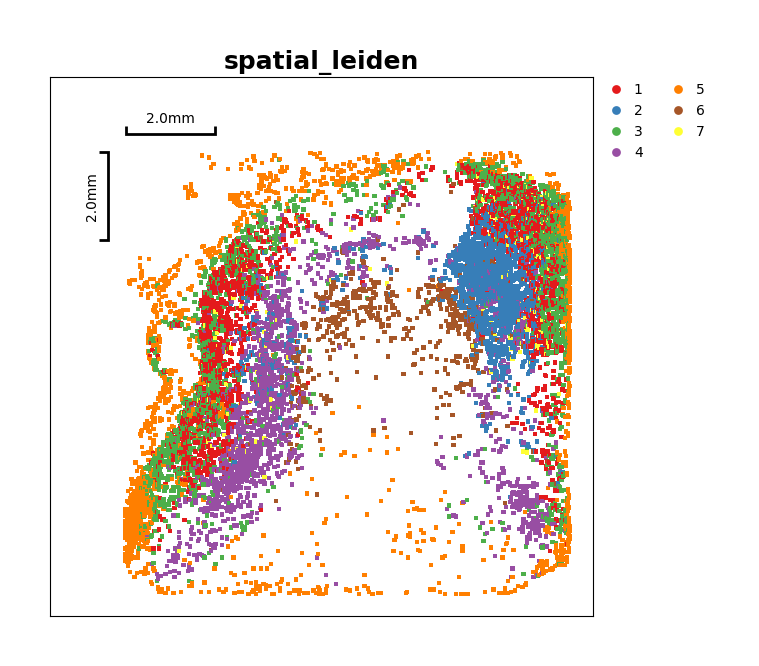

In [83]:
data.plt.cluster_scatter(res_key='spatial_leiden')

### Louvain

When clustering by Louvain algorithm, just run:

In [85]:
data.tl.louvain(neighbors_res_key='neighbors', res_key='louvain')

[2025-03-28 00:04:01][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run louvain...
[2025-03-28 00:04:01][Stereo][32960][MainThread][18200][_louvain][109][INFO]:     using the "louvain" package of Traag (2017)
[2025-03-28 00:04:03][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: louvain end, consume time 1.8167s.


Show the spatial distribution of Louvain clustering.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

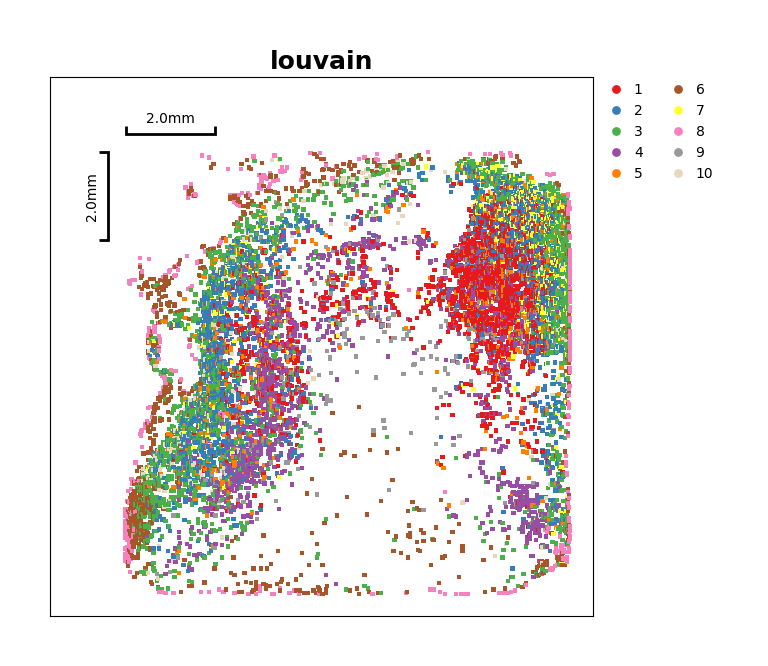

In [87]:
data.plt.cluster_scatter(res_key='louvain')

### Phenograph

When clustering by Phenograph algorithm, just run:

In [89]:
data.tl.phenograph(phenograph_k=30, pca_res_key='pca', res_key='phenograph')

[2025-03-28 00:04:25][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run phenograph...


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8409061431884766 seconds
Jaccard graph constructed in 9.3871488571167 seconds
Running Leiden optimization
Leiden completed in 2.2018496990203857 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 19.367934703826904 seconds


[2025-03-28 00:04:44][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: phenograph end, consume time 19.7152s.


Show the spatial distribution of Phenograph clustering.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

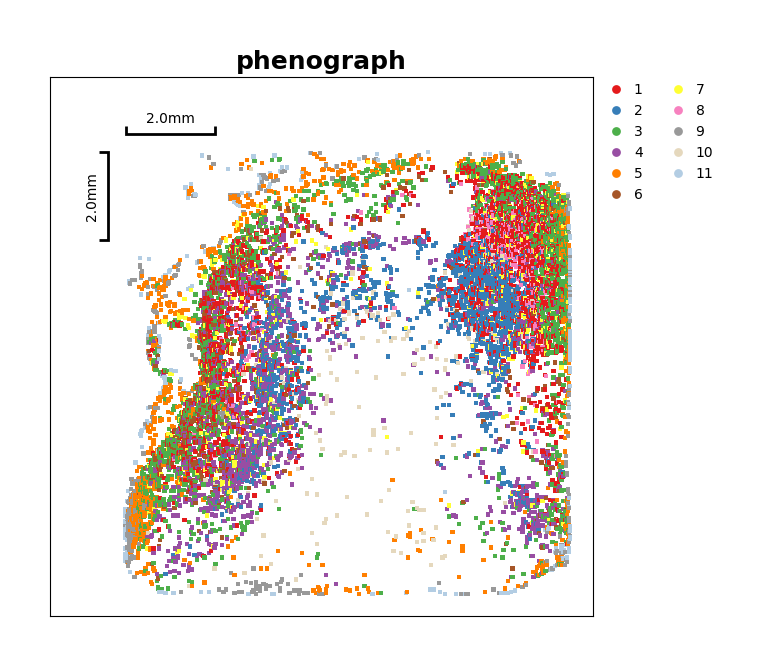

In [91]:
data.plt.cluster_scatter(res_key='phenograph')

## Find Marker Genes

Hypothesis test is used to compute a ranking of differentially expressed genes among clusters. The raw count of express matrix which has been saved in `self.raw` by `data.tl.raw_checkpoint()` and highly variable genes are two optional data sets, used to find  genes.

Here supports two methods, **t_test** and **wilcoxon_test**, to find marker genes between pairs among all clusters. T-test is a common and simple approach to do so.

In [95]:
data.tl.find_marker_genes(
        cluster_res_key='leiden',
        method='t_test',
        use_highly_genes=False,
        use_raw=True
        )

[2025-03-28 00:06:06][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run find_marker_genes...
[2025-03-28 00:06:07][Stereo][32960][MainThread][18200][tool_base][122][INFO]: read group information, grouping by group column.
[2025-03-28 00:06:07][Stereo][32960][MainThread][18200][tool_base][151][INFO]: start to run...
[2025-03-28 00:06:10][Stereo][32960][MainThread][18200][tool_base][153][INFO]: end to run.
[2025-03-28 00:06:10][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: find_marker_genes end, consume time 4.3042s.


Display the ranking and scores of top 10 marker genes in each group.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

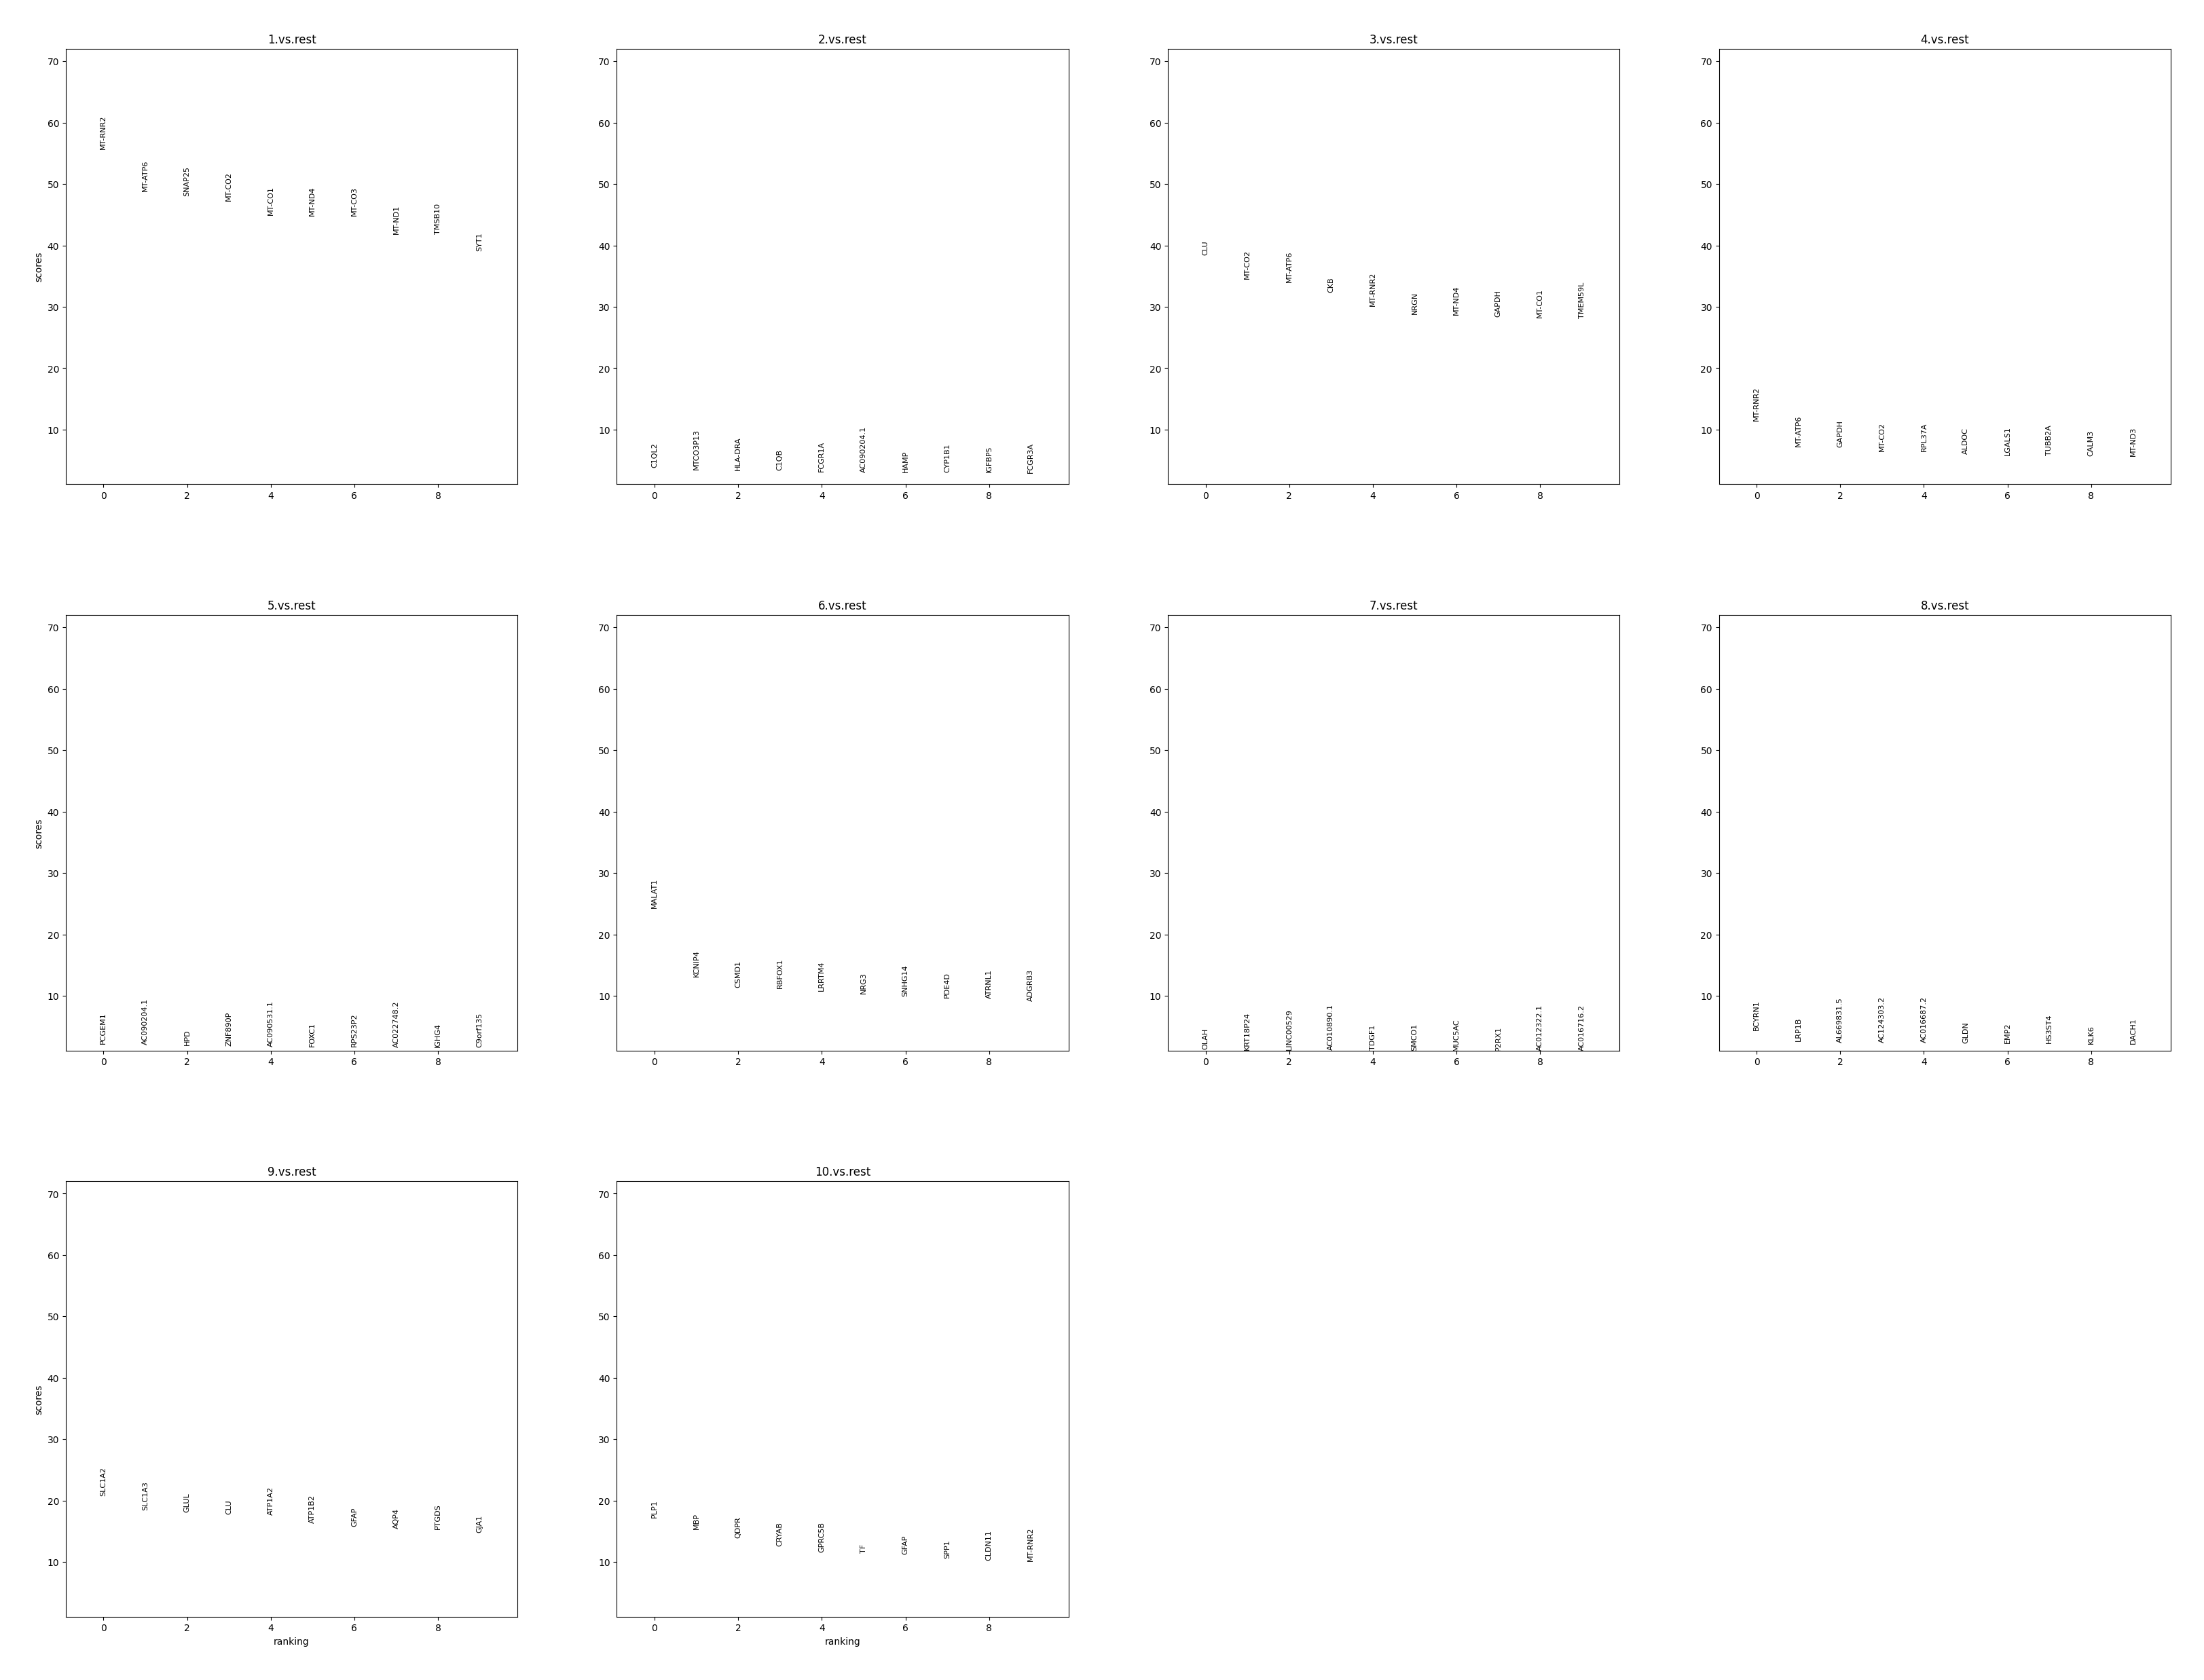

In [97]:
data.plt.marker_genes_text(
        res_key='marker_genes',
        markers_num=10,
        sort_key='scores'
        )

Display the scatter plot of top 5 marker genes in each group.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

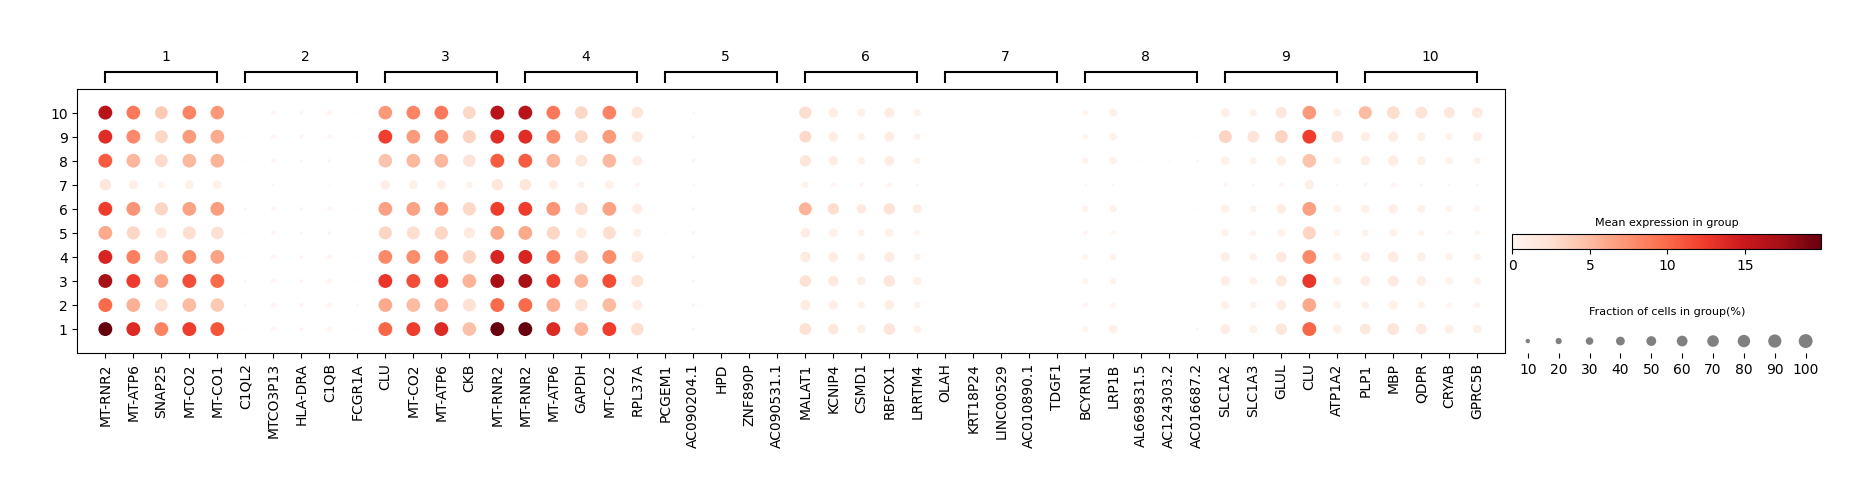

In [99]:
data.plt.marker_genes_scatter(res_key='marker_genes', markers_num=5)

Meanwhile, display the volcano plot of a specific group versus to the rest.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

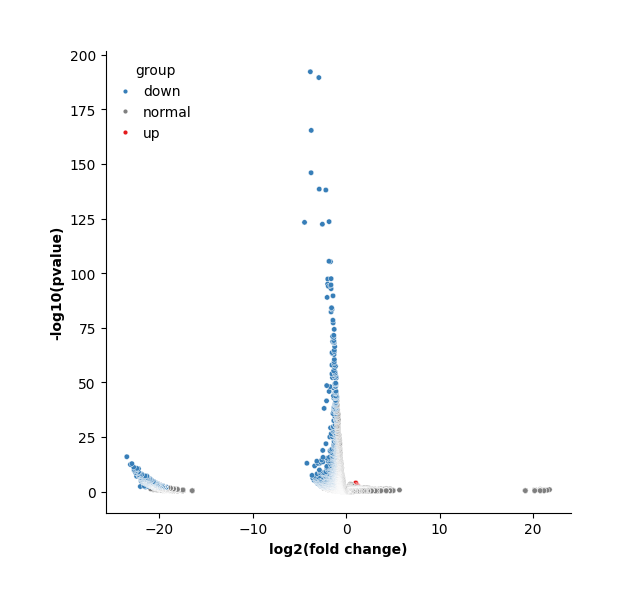

In [101]:
data.plt.marker_gene_volcano(group_name='2.vs.rest', vlines=False)

You can also filter out genes based on log fold change and fraction of genes expressing the gene within and outside each group.

In [103]:
data.tl.filter_marker_genes(
    marker_genes_res_key='marker_genes',
    min_fold_change=1,
    min_in_group_fraction=0.25,
    max_out_group_fraction=0.5,
    res_key='marker_genes_filtered'
)

[2025-03-28 00:07:16][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run filter_marker_genes...
[2025-03-28 00:07:17][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: filter_marker_genes end, consume time 1.5018s.


## Annotation

After finding marker genes, we can annotate clustering results by using `data.tl.annotation` or `data.plt.interact_annotation_cluster`

In [105]:
data.plt.interact_annotation_cluster(
            res_cluster_key='leiden',
            res_marker_gene_key='marker_genes',
            res_key='leiden_annotation'
            )

Row
    [0] ParamFunction(function, _pane=HoloViews)
    [1] Column
        [0] IntSlider(end=200, name='dot size', start=1, value=7, width=200)
        [1] Row
            [0] Select(name='cluster', options=['1', '2', '3', ...], value='1', width=100)
            [1] TextInput(name='annotation', width=100)
        [2] Button(name='Save annotation', width=200)
        [3] ParamFunction(function, _pane=DataFrame)

Use command lines to annotate clusters:

In [107]:
annotation_dict = {
    '1':'a', '2':'b',
    '3':'c', '4':'d',
    '5':'e', '6':'f',
    '7':'g', '8':'h',
    '9':'i', '10':'j',
    '11':'k', '12': 'l',
    '13': 'm', '14': 'n',
    '15': 'o', '16': 'p',
    '17': 'q', '18': 'r',
    '19': 's', '20': 't',
    '21': 'u', '22': 'v',
    '23': 'w', '24': 'x',
    '25': 'y', '26': 'z'
    }
data.tl.annotation(
        annotation_information=annotation_dict,
        cluster_res_key='leiden',
        res_key='anno_leiden'
        )

[2025-03-28 00:07:51][Stereo][32960][MainThread][18200][st_pipeline][41][INFO]: start to run annotation...
[2025-03-28 00:07:51][Stereo][32960][MainThread][18200][st_pipeline][44][INFO]: annotation end, consume time 0.2944s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

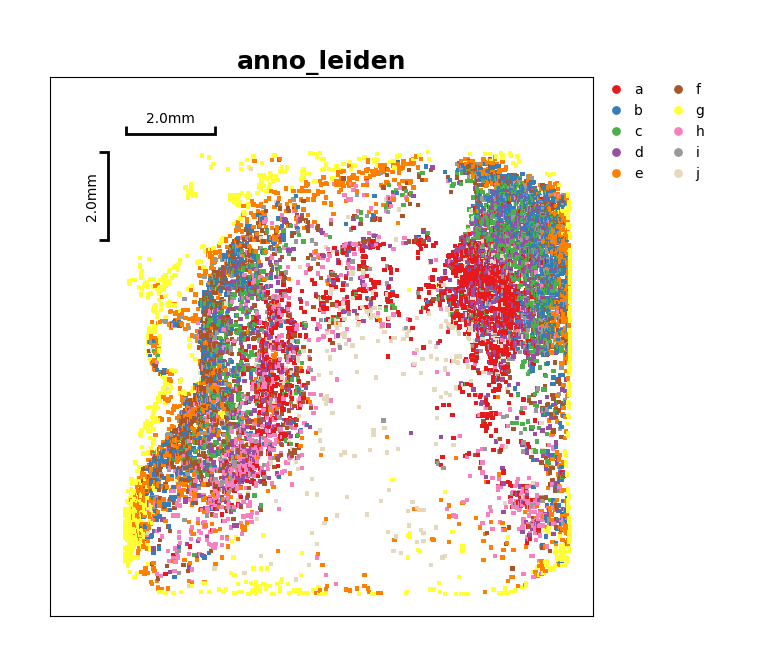

In [109]:
data.plt.cluster_scatter(res_key='anno_leiden')

At the end, you could transform our data object to AnnData and save analysis results into an H5ad file.

In [111]:
adata = st.io.stereo_to_anndata(data, output='GSM8330060_B02009F6_seurat.h5ad')

[2025-03-28 00:08:24][Stereo][32960][MainThread][18200][reader][960][INFO]: Adding sample in adata.obs['orig.ident'].
[2025-03-28 00:08:24][Stereo][32960][MainThread][18200][reader][963][INFO]: Adding data.position as adata.obsm['spatial'] .
[2025-03-28 00:08:24][Stereo][32960][MainThread][18200][reader][968][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2025-03-28 00:08:24][Stereo][32960][MainThread][18200][reader][1008][INFO]: Adding data.tl.result['highly_variable_genes'] into adata.var .
[2025-03-28 00:08:24][Stereo][32960][MainThread][18200][reader][1051][INFO]: Adding data.tl.result['pca'] into adata.obsm['X_pca'] .
[2025-03-28 00:08:24][Stereo][32960][MainThread][18200][reader][1056][INFO]: Adding data.tl.result['pca_variance_ratio'] into adata.uns['pca_variance_ratio'] .
[2025-03-28 00:08:24][Stereo][32960][MainThread][18200][reader][1064][INFO]: Adding data.tl.result['neighbors']['connectivities'] into adata.obsp['connectivities'] .
[2025-03-28 00:08:24][

In [113]:
adata

AnnData object with n_obs × n_vars = 12602 × 43326
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'spatial_leiden', 'louvain', 'phenograph', 'anno_leiden', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bin_type', 'bin_size', 'resolution', 'key_record', 'merged', 'sn', 'hvg', 'pca_variance_ratio', 'neighbors', 'spatial_neighbors', 'rank_genes_groups', 'rank_genes_groups_filtered', 'gene_exp_leiden', 'gene_exp_spatial_leiden', 'gene_exp_louvain', 'gene_exp_phenograph', 'gene_exp_anno_leiden', 'result_keys'
    obsm: 'spatial', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances', 'spatial_neighbors_connectivities', 'spatial_neighbors_distances'